In [27]:
from pathlib import Path

import polars as pl
import seaborn as sns

In [28]:
fig_dir = Path("/cellar/users/dlaub/projects/gvl-paper/figures")

In [31]:
thousand_gp = (
    pl.read_csv(
        "/cellar/users/dlaub/projects/gvl-paper/results/variants_random_read_throughput_1kgp.csv"
    )
    .unpivot(
        ["svar_time", "bcf_time", "plink_time"],
        index=["query_length", "n_calls", "n_variants"],
        variable_name="filetype",
        value_name="time",
    )
    .with_columns(
        pl.col("filetype")
        .str.split("_")
        .list.get(0)
        .str.to_uppercase()
        .replace({"PLINK": "PGEN"})
    )
)
thousand_gp.head()

query_length,n_calls,n_variants,filetype,time
i64,i64,i64,str,i64
2048,5,45,"""SVAR""",510900
2048,2,45,"""SVAR""",463700
2048,6,52,"""SVAR""",410188
2048,6,52,"""SVAR""",413505
2048,5,55,"""SVAR""",405761


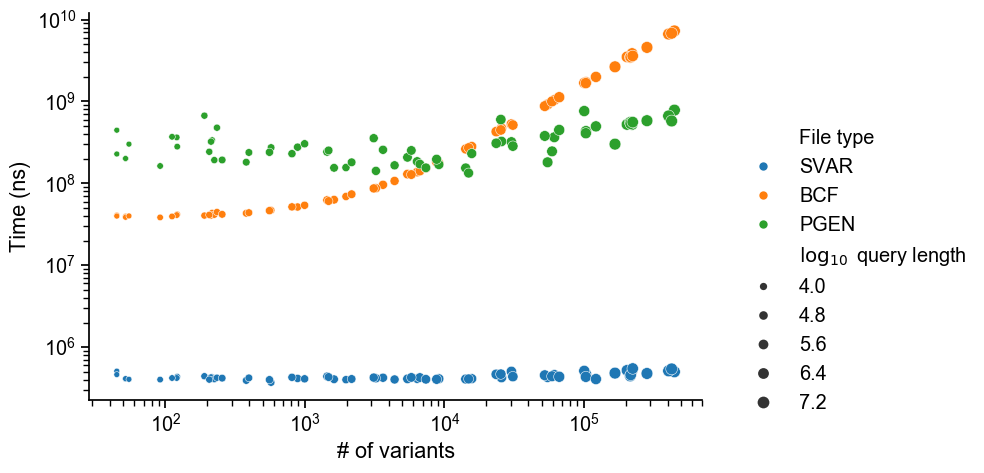

In [37]:
q_len_name = r"$\log_{10}$ query length"
data = thousand_gp.with_columns(pl.col("query_length").log(10)).rename(
    {"query_length": q_len_name, "filetype": "File type"}
)
with sns.plotting_context("notebook", font_scale=1.3):
    fg = sns.relplot(data, x="n_variants", y="time", hue="File type", size=q_len_name)
    _ = fg.set(xlabel="# of variants", xscale="log", ylabel="Time (ns)", yscale="log")
    sns.move_legend(fg, "upper left", bbox_to_anchor=(1, 0.75))
    fg.figure.tight_layout()
    fg.savefig(
        fig_dir / "variant_throughput_1kgp.png",
        dpi=300,
        bbox_inches="tight",
    )
    fg.savefig(fig_dir / "variant_throughput_1kgp.svg")

In [33]:
gdc = (
    pl.read_csv(
        "/cellar/users/dlaub/projects/gvl-paper/results/variants_random_read_throughput_gdc.csv"
    )
    .unpivot(
        ["svar_time", "bcf_time", "plink_time"],
        index=["query_length", "n_calls", "n_variants"],
        variable_name="filetype",
        value_name="time",
    )
    .with_columns(
        pl.col("filetype")
        .str.split("_")
        .list.get(0)
        .str.to_uppercase()
        .replace({"PLINK": "PGEN"})
    )
)
gdc.head()

query_length,n_calls,n_variants,filetype,time
i64,i64,i64,str,i64
2048,0,207,"""SVAR""",551297
2048,0,0,"""SVAR""",554833
2048,0,258,"""SVAR""",442229
2048,0,308,"""SVAR""",427070
2048,0,0,"""SVAR""",422342


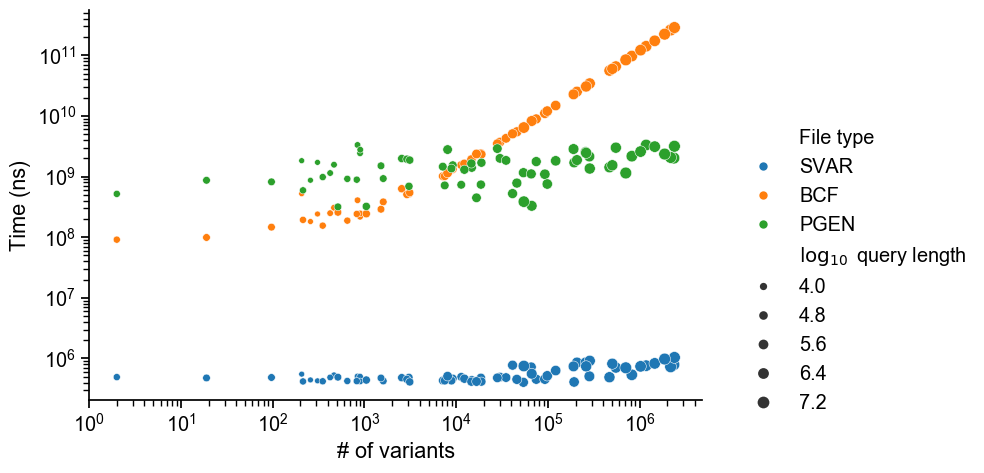

In [38]:
q_len_name = r"$\log_{10}$ query length"
data = gdc.with_columns(pl.col("query_length").log(10)).rename(
    {"query_length": q_len_name, "filetype": "File type"}
)
with sns.plotting_context("notebook", font_scale=1.3):
    fg = sns.relplot(data, x="n_variants", y="time", hue="File type", size=q_len_name)
    _ = fg.set(xlabel="# of variants", xscale="log", ylabel="Time (ns)", yscale="log")
    sns.move_legend(fg, "upper left", bbox_to_anchor=(1, 0.75))
    fg.figure.tight_layout()
    fg.savefig(
        fig_dir / "variant_throughput_gdc.png",
        dpi=300,
        bbox_inches="tight",
    )
    fg.savefig(fig_dir / "variant_throughput_gdc.svg")